## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Initialize the environment

In [2]:
env = Maze()

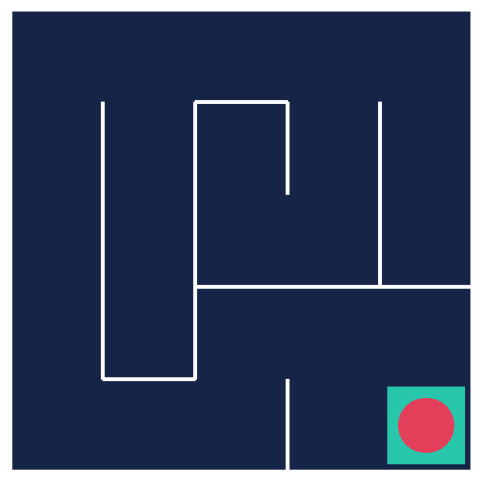

In [3]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [11]:
action_values = np.full((5,5,4), -100) # assigning -100 as an arbitrary value to each q-value
action_values[4,4,:] = 0 # assigning zero for the goal state 

#### Plot $Q(s, a)$

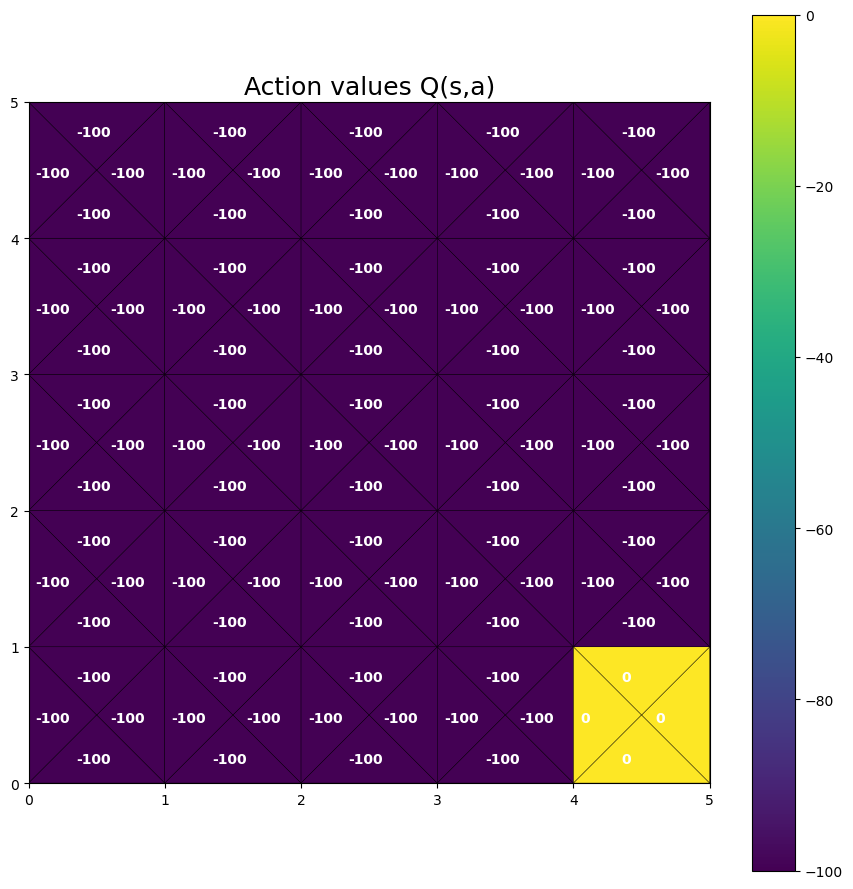

In [12]:
plot_action_values(action_values)
# each square represents one state of the task and each triangle represents the estimated q-value of each action

## Define the target policy $\pi(s)$

#### Create the policy $\pi(s)$

In [13]:
def target_policy(state):
    av = action_values[state] # storing the 4 q-values of a state into a vector
    return np.random.choice(np.flatnonzero(av == av.max()))

#### Test the policy with state (0, 0)

In [16]:
action = target_policy((0,0))
print(f"Action taken in state (0,0) is {action}")

Action taken in state (0,0) is 2


#### Plot the policy

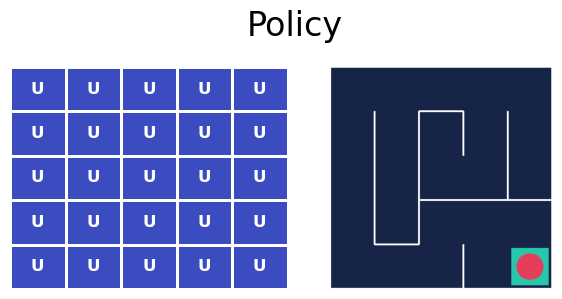

In [18]:
plot_policy(action_values, frame)

## Define the exploratory policy $b(s)$

#### Create the policy $b(s)$

In [19]:
def exploratory_policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))
    

#### Test the policy with state (0, 0)

In [23]:
action = exploratory_policy((0,0), epsilon=0.5)
print(f"Action taken in state (0,0) is {action}")

Action taken in state (0,0) is 0


## Implement the algorithm

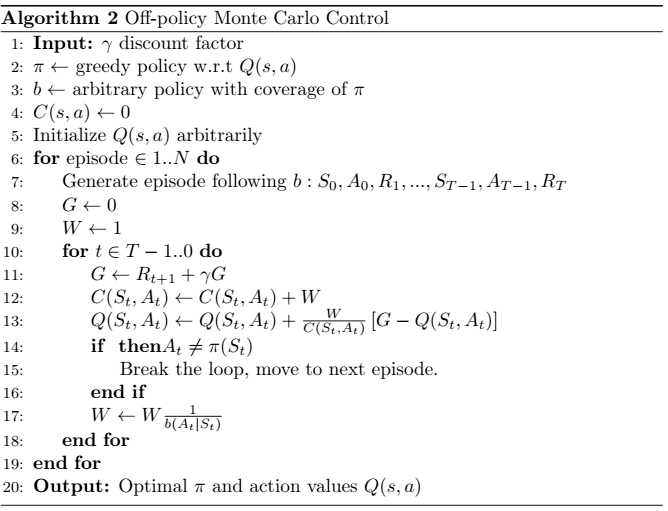

</br>



<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [28]:
def off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes, gamma=0.99, epsilon=0.2):
    
    csa = np.zeros((5,5,4))
    
    for episode in range(1, episodes+1):
        G = 0
        W = 1
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
            
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W / csa[state_t][action_t]) * (G - qsa)
            
            if action_t != target_policy(state_t):
                break
            
            W = W + 1 / (1 - epsilon + epsilon / 4)
                
    
    
    
    

In [33]:
off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes=1000, epsilon=0.3)

## Show results

#### Show resulting value table $Q(s, a)$

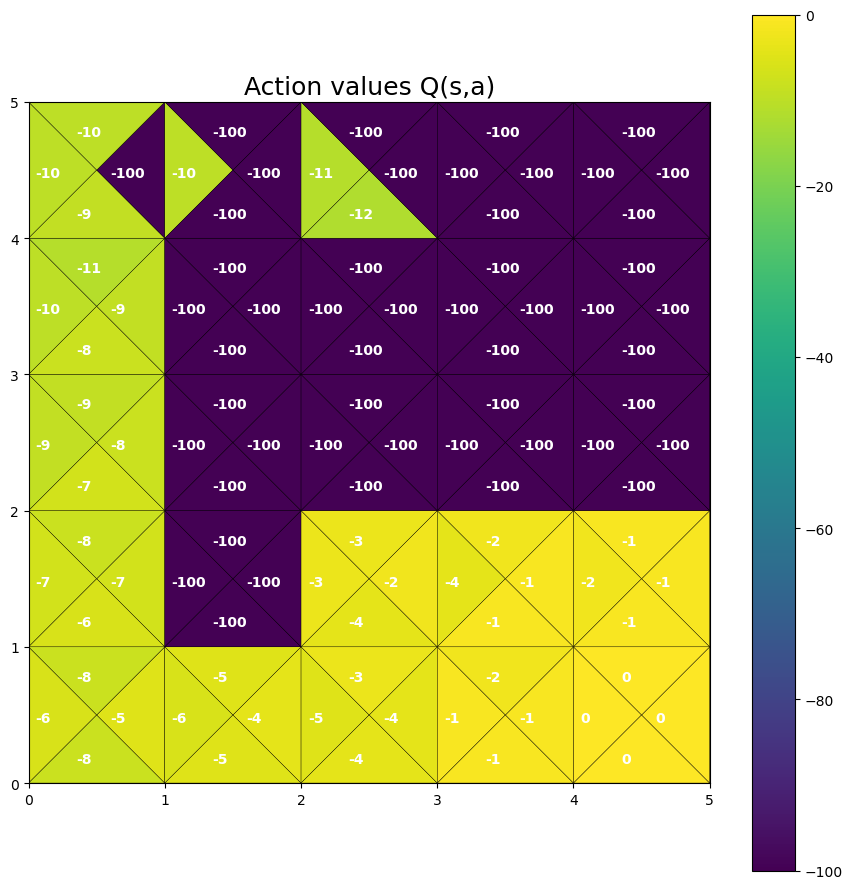

In [34]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

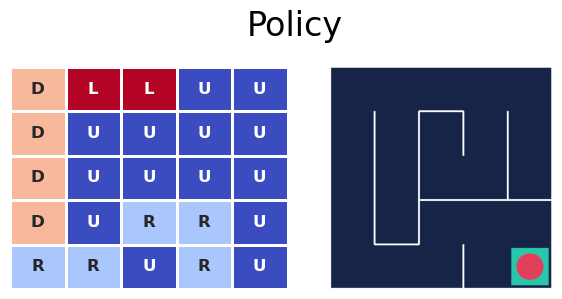

In [35]:
plot_policy(action_values, frame)

#### Test the resulting agent

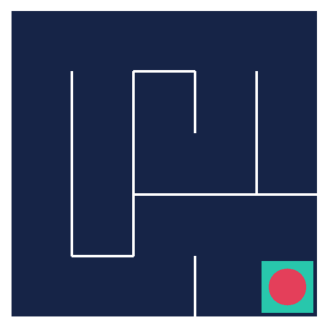

In [36]:
test_agent(env, target_policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 5: Monte Carlo methods](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)